# Python Statistics Homework
__IMPRS Python course 2022__  
*18-05-22*

This is a script that analyzed experiment data:  
In the experiment participants reaction times were measured under three conditions: baseline, condition_a and condition_b.  
With this script condition_a and condition_b will each be compared to the baseline condition.  
To analyze the data summary descriptives is calculated, the data is visualized in a density plot and finally a linear mixed model is fitted to the data in order to statistically compare condition_a and condition_b to the baseline

__0. Import packages__

In [14]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statistics
import numpy as np
import pandas as pd
import os
import plotnine as gg 
from plotnine import ggplot

__1. Get data__


Loading participant data and trial data and merging then into a complete dataset.

In [28]:
participants = pd.read_csv('participants.csv')
participants

# go through the participant list and load the data
trials = pd.DataFrame()
for participant_id in participants['id']:
    participant_data = pd.read_csv(f'participants/{participant_id}.csv')
    trials = trials.append(participant_data)

trials.head(-5)
# merge participant and trial data
trials = trials.merge(participants, on='id')
trials.rename(columns={'Unnamed: 0': 'trial_order'}, inplace=True)
trials.head(-300)
trials

C:\Users\Mareike\AppData\Local\Temp\ipykernel_132140\3888056623.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\Mareike\AppData\Local\Temp\ipykernel_132140\3888056623.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\Mareike\AppData\Local\Temp\ipykernel_132140\3888056623.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\Mareike\AppData\Local\Temp\ipykernel_132140\3888056623.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\Mareike\AppData\Local\Temp\ipykernel_132140\3888056623.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.c

,trial_order,id,condition,RT,first_name,last_name,age,sex
0,0,83633,condition_a,711.093867,Stacy,Burton,33,male
1,1,83633,baseline,351.301881,Stacy,Burton,33,male
2,2,83633,condition_a,720.382681,Stacy,Burton,33,male
3,3,83633,condition_a,329.828212,Stacy,Burton,33,male
4,4,83633,baseline,188.586183,Stacy,Burton,33,male
...,...,...,...,...,...,...,...,...
1195,115,90709,baseline,399.521017,Natalie,Newton,23,female
1196,116,90709,condition_b,174.347050,Natalie,Newton,23,female
1197,117,90709,baseline,160.265914,Natalie,Newton,23,female
1198,118,90709,baseline,357.141627,Natalie,Newton,23,female


__2. Table summarizing data__


Making a table that gives several descriptive measures for each condition.

In [32]:
descr = trials.groupby("condition")["RT"].describe()
descr

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
baseline,400.0,481.484448,283.582387,81.592858,290.396585,405.965007,572.702759,1894.253710
condition_a,400.0,759.387950,476.263170,115.340660,442.665000,634.627644,951.834830,3739.385181
condition_b,400.0,452.634481,301.176629,93.823053,254.032399,372.003101,571.951717,2368.593152


__3. Plot comparing RTs per condition__

Density plot comparing the distributions of RTs between conditions.

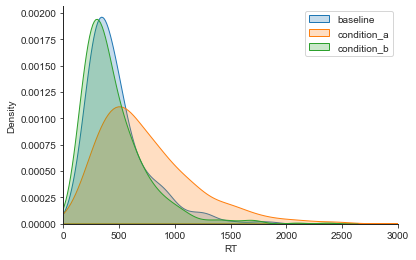

In [34]:
#plot
def kde_plot(df, conditions, dv, col_name, save_file=False):
    sns.set_style('white')
    sns.set_style('ticks')
    fig, ax = plt.subplots()
    ax.spines['left'].set_linewidth(1)
    ax.spines['bottom'].set_linewidth(1)

    for cond in conditions:
        condition_data = df[(df[col_name] == cond)][dv]
        sns.kdeplot(condition_data, shade=True, label=cond)
        
    sns.despine()
    plt.legend(labels=cond, frameon=False)
    legend = plt.legend()
    frame = legend.get_frame()
    frame.set_facecolor('white')
    plt.xlim([0,3000])
    if save_file:
        plt.savefig("kde_" + dv + ".png")
    plt.show()


kde_plot(trials, ['baseline', 'condition_a', 'condition_b'],  'RT', 'condition',
         save_file=True)

__4. Statistical test__

Fitting lmer with condition as fixed effect and id as random effect

In [46]:
import statsmodels.formula.api as smf

lmm0 = smf.mixedlm("RT ~ condition", trials, groups = 'id', re_formula='1')
lmm0f = lmm0.fit()
print(lmm0f.summary())

                 Mixed Linear Model Regression Results
Model:                 MixedLM      Dependent Variable:      RT         
No. Observations:      1200         Method:                  REML       
No. Groups:            10           Scale:                   111885.7503
Min. group size:       120          Log-Likelihood:          -8679.7654 
Max. group size:       120          Converged:               Yes        
Mean group size:       120.0                                            
------------------------------------------------------------------------
                           Coef.   Std.Err.   z    P>|z|  [0.025  0.975]
------------------------------------------------------------------------
Intercept                  481.484   50.806  9.477 0.000 381.906 581.063
condition[T.condition_a]   277.904   23.652 11.750 0.000 231.546 324.261
condition[T.condition_b]   -28.850   23.652 -1.220 0.223 -75.208  17.508
id Var                   23015.503   33.879                          

results:

- RTs are significantly longer in condition_a compared to the baseline.
- There is no significant difference in RT between condtion_b and the baseline.